<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting the data</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Cleaning-and-preparing-the-data" data-toc-modified-id="Cleaning-and-preparing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning and preparing the data</a></span><ul class="toc-item"><li><span><a href="#Numerical-features" data-toc-modified-id="Numerical-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerical features</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding-(codage-disjonctif-complet)" data-toc-modified-id="One-hot-encoding-(codage-disjonctif-complet)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>One-hot-encoding (codage disjonctif complet)</a></span></li><li><span><a href="#From-text-to-one-hot-encoding-directly" data-toc-modified-id="From-text-to-one-hot-encoding-directly-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>From text to one-hot-encoding directly</a></span></li></ul></li><li><span><a href="#On-demands-transformers" data-toc-modified-id="On-demands-transformers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>On demands transformers</a></span></li><li><span><a href="#Pipelines" data-toc-modified-id="Pipelines-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pipelines</a></span></li></ul></li><li><span><a href="#Training-the-models" data-toc-modified-id="Training-the-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the models</a></span><ul class="toc-item"><li><span><a href="#Training-on-the-train-set" data-toc-modified-id="Training-on-the-train-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training on the train set</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

# Housing price predictions

In [1]:
import os
import tarfile
from urllib import request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()

In [5]:
housing = load_housing_data()

## Data exploration

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


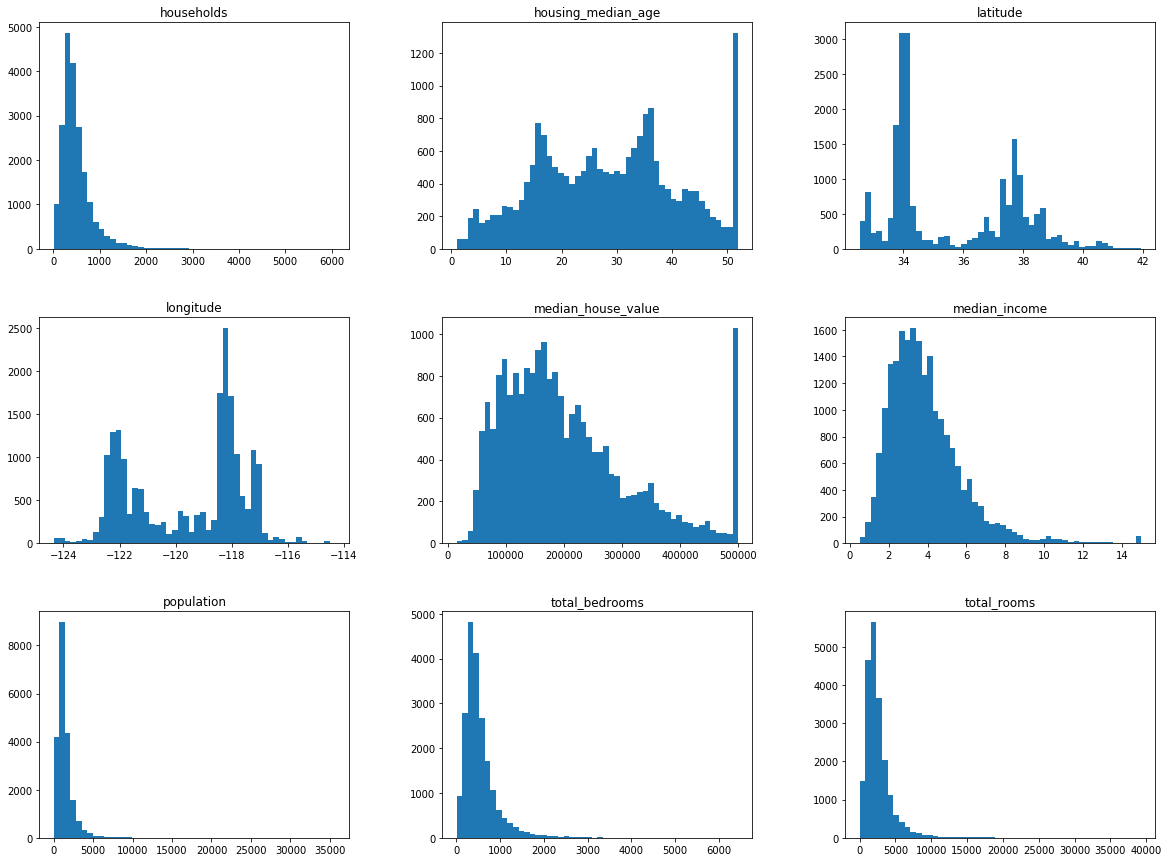

In [10]:
housing.hist(bins=50,figsize=(20,15),grid=False)
plt.show()

In [11]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] <5, 5.0, inplace=True)

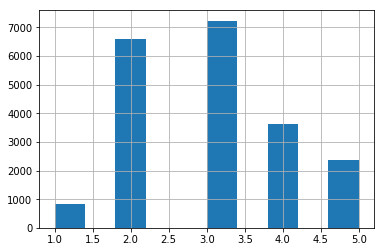

In [12]:
housing['income_cat'].hist()

In [13]:
housing['income_cat'].value_counts() /len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [15]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\Victor\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
# a copy to manipulate without fear
housing = test_set.copy()

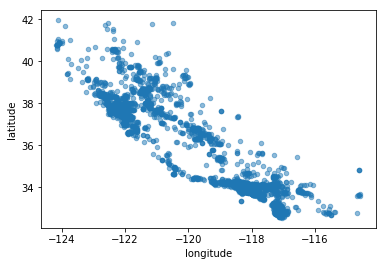

In [17]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5)

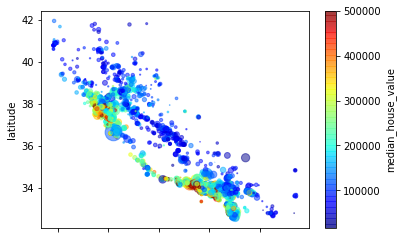

In [18]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5, s=housing['population']/100, c='median_house_value',cmap = plt.get_cmap('jet'),colorbar=True)

In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

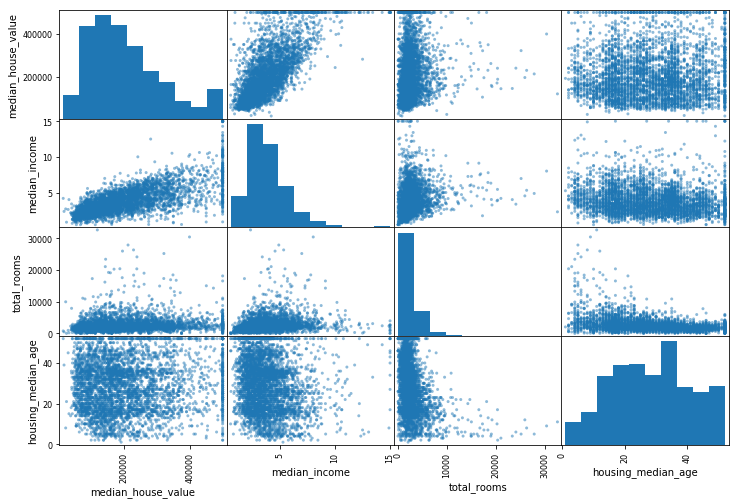

In [21]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

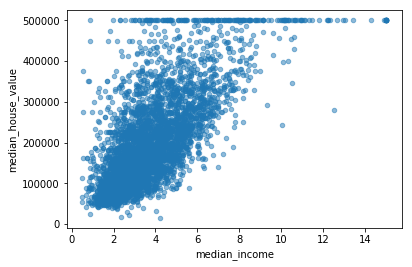

In [22]:
housing.plot(kind='scatter', x='median_income',y='median_house_value',alpha=0.5)

In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
housing['bedroom_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['rooms_per_households'] = housing['total_rooms'] / housing['households']
housing['population_per_households'] = housing['population'] / housing['households']

In [25]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.691831
rooms_per_households         0.192575
total_rooms                  0.131435
housing_median_age           0.071357
households                   0.071242
total_bedrooms               0.057568
population                  -0.016033
longitude                   -0.039987
population_per_households   -0.135142
latitude                    -0.150124
bedroom_per_room            -0.240362
Name: median_house_value, dtype: float64

## Cleaning and preparing the data

### Numerical features

In [26]:
housing = train_set.drop('median_house_value',axis=1)
housing_labels = train_set['median_house_value'].copy()

Imputer is an estimator, you need to choose a strategy

In [27]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [28]:
housing_num = housing.drop('ocean_proximity', axis=1)

Now we call the fit_transform method which return a numpy array

In [29]:
X = imputer.fit_transform(housing_num)

In [30]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
imputer.strategy

'median'

And finally, we give it to a DataFrame

In [32]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [33]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Categorical features

The Label Encoder transforms a categorical variable into a numerical one

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [35]:
encoder.classes_ # to check the original values

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

#### One-hot-encoding (codage disjonctif complet)

With the previous encoding, two close variables seem close to the computer whereas they might be opposite in reality.
That's why we use one_hot_encoding which is a binary encoding for each variable.

Fit_transform expect a 2-D array so reshape it with reshape: 1 means one column and -1 ask numpy to figure the number of rows according to dimensions.
The result is a sparse matrix (matrice creuse) in SciPy format

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_hot1 = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_hot1

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Convert sparse matrix into dense numpy array

In [37]:
housing_cat_hot1.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### From text to one-hot-encoding directly

In [38]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer() #by default, it returns a numpy array
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


### On demands transformers
3 methods to implement:
- fit() (which returns self)
- transform()
- fit transform()

To get the fit_transform() automatically, you just need to pass TransformerMixin as a base Class.

BaseEstimator gives us get_params() and set_params() methods to tune hyperparameters

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, populations_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        populations_per_household = X[:,populations_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, populations_per_household, bedrooms_per_room] #np_c concatenate matrices
        else:
            return np.c_[X,rooms_per_household, populations_per_household]

In [41]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Pipelines
First, a class to select the right data and returning a NumPy array

In [42]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from future_encoder import OneHotEncoder

#names of the attributes
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
housing_prepared.shape

(16512, 16)

## Training the models

### Training on the train set

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions : ', lin_reg.predict(some_data_prepared))

Predictions :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [47]:
print(some_labels)

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [48]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions,housing_labels)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  68628.19819848923


In [49]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(housing_prepared, housing_labels)
housing_predictions = decision_tree.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions,housing_labels)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  0.0


### Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std: ', scores.std())
display_scores(tree_rmse_scores)

Scores:  [68779.91961975 68903.22550354 72925.00822177 69428.5222385
 71545.99480015 74127.1080196  70414.96967442 69548.78254262
 76873.37163748 70111.45246227]
Mean:  71265.83547200995
Std:  2502.0981756894034


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Std:  2731.6740017983466


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
random_forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(random_forest_rmse_scores)

Scores:  [51894.77123165 50145.2156611  51059.93278747 55194.51185001
 51930.81502368 55906.29013704 52052.052387   51108.16046446
 56646.72922842 52655.593239  ]
Mean:  52859.40720098221
Std:  2126.922528246132


### Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [56]:
forest_reg = grid_search.best_estimator_

In [57]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
random_forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(random_forest_rmse_scores)

Scores:  [48717.97754097 47839.42691769 49026.11802275 51574.02242116
 49675.75848112 52724.45840469 47536.51387648 46931.41293472
 52201.21927052 49327.25541976]
Mean:  49555.41632898518
Std:  1899.2591207802675


In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

62818.513424850054 {'max_features': 2, 'n_estimators': 3}
55209.16285573782 {'max_features': 2, 'n_estimators': 10}
53058.630942310454 {'max_features': 2, 'n_estimators': 30}
60866.909706871775 {'max_features': 4, 'n_estimators': 3}
52616.51266780863 {'max_features': 4, 'n_estimators': 10}
50493.549255796206 {'max_features': 4, 'n_estimators': 30}
60102.535848740255 {'max_features': 6, 'n_estimators': 3}
51939.21857280816 {'max_features': 6, 'n_estimators': 10}
50141.048906900185 {'max_features': 6, 'n_estimators': 30}
58058.517099325196 {'max_features': 8, 'n_estimators': 3}
52264.82537155459 {'max_features': 8, 'n_estimators': 10}
49825.69867847671 {'max_features': 8, 'n_estimators': 30}
63242.991570546576 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54568.2778520857 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60221.38971866067 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53349.46004260153 {'bootstrap': False, 'max_features': 3, 'n_estimato

Analyzing best models

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [60]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4320540438280114, 'median_income'),
 (0.12182118949293157, 'INLAND'),
 (0.11286277607461095, 'pop_per_hhold'),
 (0.06967574976301359, 'longitude'),
 (0.06269708199757126, 'latitude'),
 (0.042262875768413345, 'rooms_per_hhold'),
 (0.042198479757269806, 'housing_median_age'),
 (0.037611016147807756, 'bedrooms_per_room'),
 (0.015642796491495428, 'population'),
 (0.015072805983139103, 'total_bedrooms'),
 (0.014835150704499997, 'total_rooms'),
 (0.01416361059673491, 'households'),
 (0.012914599721008408, '<1H OCEAN'),
 (0.0036562904215556523, 'NEAR OCEAN'),
 (0.002438172786398568, 'NEAR BAY'),
 (9.336046553832553e-05, 'ISLAND')]

In [61]:
X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = forest_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47202.6123382552


## Exercises

In [62]:
from sklearn.svm import SVR
param_grid = [
    {'C': [0.1, 1, 3, 10, 30, 100]}
]
svm_reg = SVR(kernel='linear')
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 1, 3, 10, 30, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
grid_search.best_params_

{'C': 100}

In [65]:
svm_reg = grid_search.best_estimator_

In [66]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores:  [68642.41393844 69430.54481165 72031.87174908 74038.38374817
 70448.20005159 74838.91813041 67679.40029549 71188.39613988
 74437.05064953 71434.2802488 ]
Mean:  71416.94597630421
Std:  2338.483800715027


In [ ]:
s